In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
import os
import configs
from math import floor, ceil

from Model import Model
from PlaceInputs import PlaceInputs
from utils import *
from utils_summary_statistics import *
import configs

# Load data

In [2]:
stats = []
labels = []

In [3]:
# Load default model results
with open('pickles/resolution_default.p', 'rb') as f:
    default_stats = pickle.load(f)
stats.append(default_stats)
labels.append('Default')

In [4]:
# Load barcode ablation results
with open('pickles/resolution_barcode_ablation.p', 'rb') as f:
    bar_ablate_stats = pickle.load(f)
stats.append(bar_ablate_stats)
labels.append('Barcode Ablation')

In [5]:
# Load place field ablation results
with open('pickles/resolution_place_field_ablation.p', 'rb') as f:
    place_ablate_stats = pickle.load(f)
stats.append(place_ablate_stats)
labels.append('Place Field Ablation')

# Identification: midpoint accuracy plots

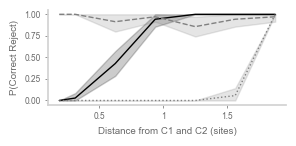

In [10]:
fig, ax = plt.subplots(figsize=(3., 1.5))
linestyles = ['-', 'dotted', '--']
for idx in range(len(stats)):
    stat = stats[idx]
    label = labels[idx]
    linestyle = linestyles[idx]
    df = pd.DataFrame(stat['identification_2'])
    df = df[df['search strength']==0.]
    df['binarized'] = df['noncache val'] < 0.5
    color = 'black' if idx==0 else 'grey'
    sns.lineplot(
        x='site spacing', y='binarized',
        color=color, data=df
        )
    ax.lines[idx].set_linestyle(linestyle)
plt.xlabel('Distance from C1 and C2 (sites)', fontsize=7)
plt.ylabel('P(Correct Reject)', fontsize=7)
plt.xticks([8, 16, 24], [0.5, 1, 1.5], fontsize=6)
plt.yticks([0., 0.25, 0.5, 0.75, 1.], fontsize=6)
plt.tight_layout()
plt.savefig('figures/fig5c.svg', dpi=300, transparent=True)
plt.show()

# Reconstruction: P(found closest attractor | distance to closest attractor)

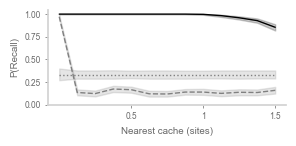

In [9]:
fig, ax = plt.subplots(figsize=(3., 1.5))
linestyles = ['-', 'dotted', '--']
for idx in range(len(stats)):
    stat = stats[idx]
    label = labels[idx]
    linestyle = linestyles[idx]
    try:
        stat['reconstruct_1'].pop('is_cache_conditioned_on_valid')
    except:
        pass
    df = pd.DataFrame(stat['reconstruct_1'])
    df = df[df['search strength']==1.]
    df = df[df['site spacing']>20]
    df = df[df['distance from closest cache'] <= 12]
    df['val'] = df['is_closest'] & df['high_readout']
    color = 'black' if idx==0 else 'grey'
    sns.lineplot(
        x='distance from closest cache', y='val',
        ax=ax, data=df,
        color=color,
        )
    ax.lines[idx].set_linestyle(linestyle)
plt.ylabel('P(Recall)', fontsize=7)
plt.xlabel('Nearest cache (sites)', fontsize=7)
plt.xticks([4, 8, 12], [0.5, 1, 1.5], fontsize=6)
plt.yticks([0., 0.25, 0.5, 0.75, 1.], fontsize=6)
plt.tight_layout()
plt.savefig('figures/fig5d.svg', dpi=300, transparent=True)
plt.show()